# 5.5.4 Challenge: What test to use

In this dataset, (with codebook [here](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html) ), the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv("/Users/gemma/Documents/data science/data-201-resources-master/ESS_practice_data/ESSdata_Thinkful.csv")

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
# get the list of countries to work with below
countries = df['cntry'].unique().tolist()

countries

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

Country breakdown by code:

CH = Switzerland, CZ = Czech Republic, DE = Germany, ES = Spain, NO = Norway, and SE = Sweden.


## Question 1. Did people become less trusting from 2012 to 2014?  

First, a quick look at the data across the board:

<strong>Note</strong> - from the codebook, year 6 is 2012, and year 7 is 2014.

In [4]:
df.groupby('year')['ppltrst'].mean()

year
6    5.563098
7    5.556720
Name: ppltrst, dtype: float64

Next, let's take a glance at the distribution of trust people had from each country across both years.

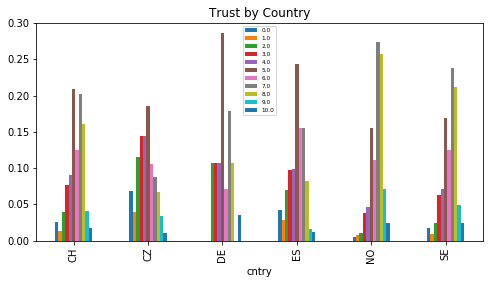

In [5]:
ax = df.groupby('cntry')['ppltrst'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                    figsize=(8,4))
plt.title("Trust by Country")
plt.legend(loc="upper center", fontsize='xx-small')
plt.show()

Looking at this graph above, it looks like NO is the most trusting, with CZ being the least trusting, on average.


Each country's average trust rating, separated by the year.

In [6]:
df.groupby(['cntry','year'])['ppltrst'].mean()

cntry  year
CH     6       5.677878
       7       5.751617
CZ     6       4.362519
       7       4.424658
DE     6       5.214286
       7       5.357143
ES     6       5.114592
       7       4.895128
NO     6       6.649315
       7       6.598630
SE     6       6.058499
       7       6.257709
Name: ppltrst, dtype: float64

Above is the average rating given by people from each country across two years. Let's check if the differences are statistically significant on a per country basis.

In [7]:

def col_by_cnyr(cn, yr, col):
    return df[(df['cntry'] == cn) & (df['year'] == yr)][col]


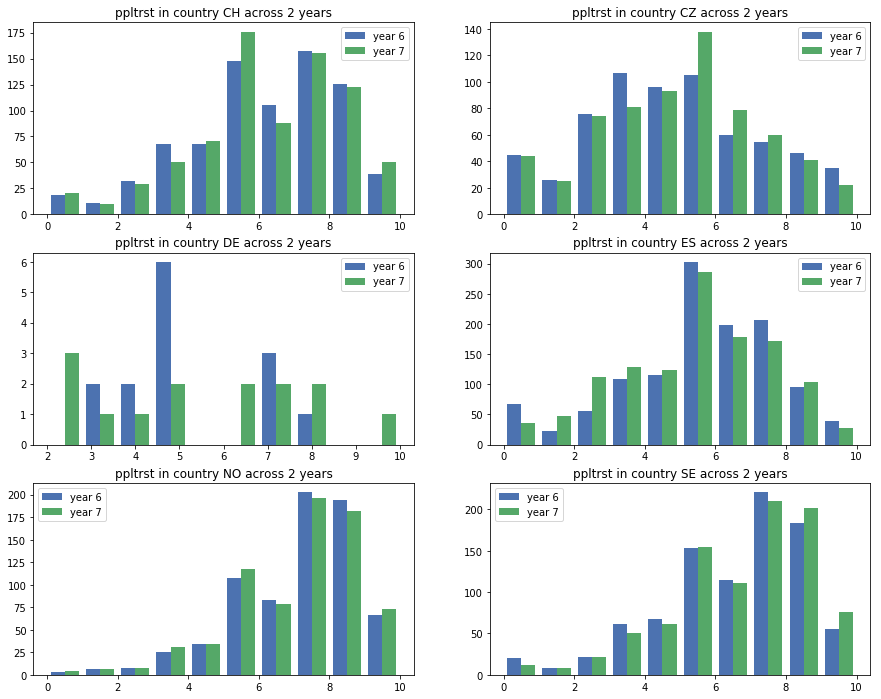

In [8]:
# iterate through countries and look at the distributions

plt.style.use('seaborn-deep')
plt.figure(figsize=(15,12))

for i, cn in enumerate(countries):
    
    six = col_by_cnyr(cn,6,'ppltrst').dropna()
    seven = col_by_cnyr(cn,7,'ppltrst').dropna()
    
  #  okay = stats.mannwhitneyu(six.values, seven.values)
    
    plt.subplot(3,2,i+1)
    plt.hist([six, seven], label=['year 6', 'year 7'])
    plt.legend(loc='best') 
    plt.title("{} in country {} across 2 years".format('ppltrst',cn)) 
       
plt.show()

The distributions are non normal, so my first thought was to run the Mann Whitney U test and the median test. However, those are for independent samples, whereas these are paired samples. Therefore the test that should be used is the Wilcoxon signed rank test, assuming the sample sizes are the same for each year. Let's first take a look into that.

In [9]:
df_nonan = df.dropna(axis=0, how="any")
df_nonan.groupby(['cntry','year']).count()

idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
cntry year                                                                  
CH    6      732    732      732      732     732    732      732     732   
      7      743    743      743      743     743    743      743     743   
CZ    6      601    601      601      601     601    601      601     601   
      7      606    606      606      606     606    606      606     606   
DE    6       13     13       13       13      13     13       13      13   
      7       14     14       14       14      14     14       14      14   
ES    6     1158   1158     1158     1158    1158   1158     1158    1158   
      7     1134   1134     1134     1134    1134   1134     1134    1134   
NO    6      708    708      708      708     708    708      708     708   
      7      712    712      712      712     712    712      712     712   
SE    6      859    859      859      859     859    859      859     859   
      7      867    867      867      867     867    867      867     867   

            gndr  agea  partner  
cntry year                       
CH    6      732   732      732  
      7      743   743      743  
CZ    6      601   601      601  
      7      606   606      606  
DE    6       13    13       13  
      7       14    14       14  
ES    6     1158  1158     1158  
      7     1134  1134     1134  
NO    6      708   708      708  
      7      712   712      712  
SE    6      859   859      859  
      7      867   867      867

Unfortunately it looks like the sample sizes aren't the same for each country across each year. We could limit the sample size to the smaller of the two for each country, but then we would be omitting some data. With such small sample sizes, that is not a good idea. Therefore, we will fall back on the Mann Whitney and median tests.

In [10]:
# store them in arrays to look at later

mann_stat = []
mann_pval = []

med_g = []
med_p = []
med_med = []
med_tbl = []

for cn in countries:
    
    six_val = col_by_cnyr(cn,6,'ppltrst') #.dropna().values
    seven_val = col_by_cnyr(cn,7,'ppltrst') #.dropna().values

    stat, p_val = stats.mannwhitneyu(six_val, seven_val)
    
    mann_stat.append(stat)
    mann_pval.append(p_val)
    
    g, p, med, tbl = stats.median_test(six_val, seven_val, nan_policy="omit", 
                                       lambda_="log-likelihood")
    med_g.append(g)
    med_p.append(p)
    med_med.append(med)
    med_tbl.append(tbl)

In [11]:
ppltrustdf = pd.DataFrame(index=countries)

array_of_array = [mann_stat, mann_pval, med_g, med_p, med_med, med_tbl]
array_of_names = ["mann_stat", "mann_pval", "med_g", "med_p", "med_med", "med_tbl"]

for i, one in enumerate(array_of_array):
    ppltrustdf[(array_of_names[i])] = one


In [12]:
ppltrustdf.sort_values(by="mann_pval",ascending=True)

,mann_stat,mann_pval,med_g,med_p,med_med,med_tbl
ES,688126.0,0.002623,5.534030,0.018650,5.0,"[[539, 480], [674, 731]]"
SE,390521.0,0.024228,4.003125,0.045416,7.0,"[[238, 278], [668, 630]]"
CZ,212706.0,0.290408,3.762350,0.052419,4.0,"[[301, 340], [350, 317]]"
CH,294004.5,0.291449,0.066364,0.796707,6.0,"[[322, 328], [451, 445]]"
NO,263282.0,0.310776,0.048000,0.826582,7.0,"[[260, 255], [470, 475]]"
DE,94.0,0.435044,0.601507,0.438004,5.0,"[[4, 7], [10, 7]]"


It looks like ES and SE are the only countries where the difference from year 6 and year 7 is statistically significant (p value of less than 0.05). Looking back at the table above (<em>Each country's average trust rating, separated by the year</em>), people in ES (Spain)'s level of trust lowered, whereas people in SE's level of trust actually grew.

The median test also reflects this same information - the p values for ES and SE are the only two below 0.05, though CZ is very close to the cutoff. It also shows the median value per country for both years combined, which is interesting when comparing the countries to each other, and in conjunction with the med_tbl value, which shows a count of the values above the median in the first tuple, and values below the median in the second tuple.




<hr width="50%" />

## Question 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Let's take a look at the mean for each country and year, and then look at the distribution of each variance to determine which test to use.

In [13]:
df.groupby(['cntry','year'])['happy'].mean()

cntry  year
CH     6       8.088312
       7       8.116429
CZ     6       6.770898
       7       6.914110
DE     6       7.428571
       7       7.857143
ES     6       7.548680
       7       7.419967
NO     6       8.251719
       7       7.915185
SE     6       7.907387
       7       7.946961
Name: happy, dtype: float64

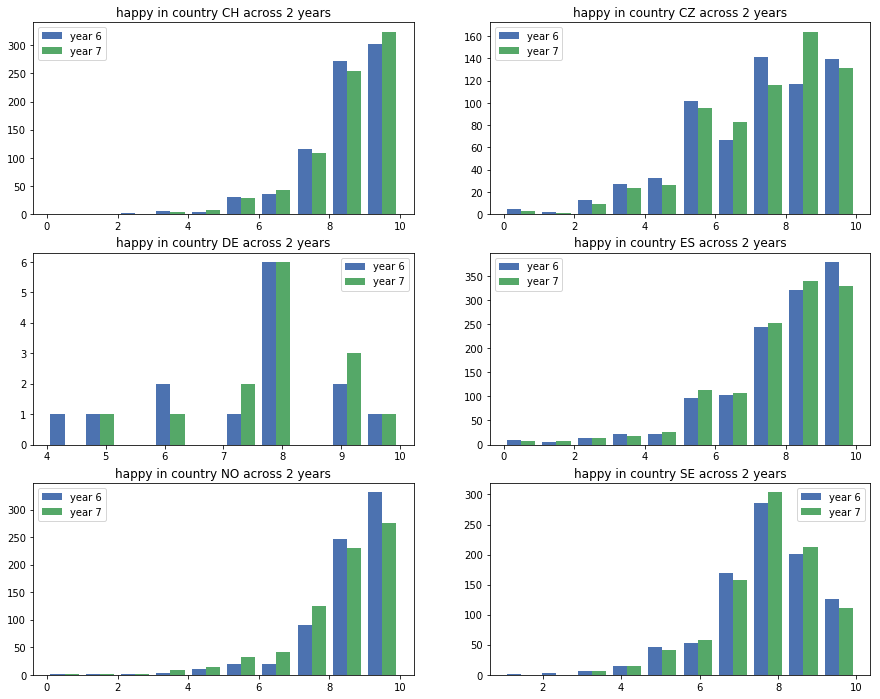

In [14]:
# iterate through countries and look at the distributions

col = "happy"

plt.style.use('seaborn-deep')
plt.figure(figsize=(15,12))

for i, cn in enumerate(countries):
    
    six = col_by_cnyr(cn,6,col).dropna()
    seven = col_by_cnyr(cn,7,col).dropna()
    
  #  okay = stats.mannwhitneyu(six.values, seven.values)
    
    plt.subplot(3,2,i+1)
    plt.hist([six, seven], label=['year 6', 'year 7'])
    plt.legend(loc='best') 
    plt.title("{} in country {} across 2 years".format(col,cn)) 
       
plt.show()

Again, the distributions are non normal, and they are paired samples, so the Wilcoxon test is ideal. However, due to the sample sizes not being the same - as discussed in Question 1 - we will use the Mann Whitney U test and the Median test to analyze the data.

In [15]:

# store them in arrays to look at later

mann_stat = []
mann_pval = []

med_g = []
med_p = []
med_med = []
med_tbl = []


for cn in countries:
    
    six_val = col_by_cnyr(cn,6,col).dropna().values
    seven_val = col_by_cnyr(cn,7,col).dropna().values

    stat, p_val = stats.mannwhitneyu(six_val, seven_val)
    
    mann_stat.append(stat)
    mann_pval.append(p_val)
    
    g, p, med, tbl = stats.median_test(six_val, seven_val, nan_policy="omit", 
                                       lambda_="log-likelihood")
    med_g.append(g)
    med_p.append(p)
    med_med.append(med)
    med_tbl.append(tbl)


In [16]:
happydf = pd.DataFrame(index=countries)

array_of_array = [mann_stat, mann_pval, med_g, med_p, med_med, med_tbl]
array_of_names = ["mann_stat", "mann_pval", "med_g", "med_p", "med_med", "med_tbl"]

for i, one in enumerate(array_of_array):
    happydf[(array_of_names[i])] = one

happydf.sort_values(by="mann_pval",ascending=True)

,mann_stat,mann_pval,med_g,med_p,med_med,med_tbl
NO,231619.5,0.000006,9.069752,0.002599,8.0,"[[332, 276], [395, 455]]"
ES,700267.5,0.021581,4.793330,0.028570,8.0,"[[379, 329], [833, 883]]"
CZ,202640.0,0.116238,3.966272,0.046420,7.0,"[[256, 295], [390, 357]]"
DE,85.0,0.273948,0.000000,1.000000,8.0,"[[3, 4], [11, 10]]"
CH,293601.5,0.318282,1.052121,0.305019,8.0,"[[302, 324], [468, 449]]"
SE,407985.5,0.411153,0.003937,0.949970,8.0,"[[327, 324], [580, 581]]"


Looking at the Mann Whitney U p value, it looks like the difference in happiness is significant in NO and ES, but none of the other countries. Looking back up at the chart of all the countries separated by year, both NO and ES saw decreases in happiness from year 6 to year 7.

The median test agrees with the Mann Whitney U test on NO and ES, however, CZ shows as also significant - at a p value of 0.046. Looking closely at the table, it appears that in CZ the happiness level actually increased from 2012 to 2014, in contrast to NO and ES.

<hr width="50%" />

## Question 3. Who reported watching more TV in 2012, men or women?

2012 is 6, and in the gender column, male is 1, female is 2.

In [17]:
df[df['year'] == 6].groupby('gndr')['tvtot'].mean()

gndr
1.0    3.901906
2.0    3.944393
Name: tvtot, dtype: float64

At a first look, it appears that women on average reported watching more TV. Let's take a look at the distribution.

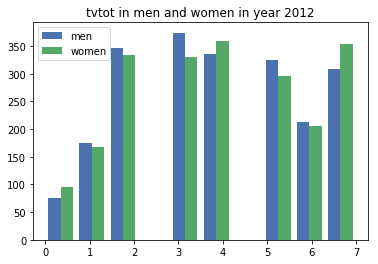

In [18]:
men = df[(df['gndr'] == 1) & (df['year'] == 6)]['tvtot'].dropna()
women = df[(df['gndr'] == 2) & (df['year'] == 6)]['tvtot'].dropna()


plt.figure()
plt.hist([men, women], label=['men', 'women'])
plt.legend(loc='best') 
plt.title("{} in men and women in year 2012".format('tvtot')) 
plt.show()

To me, it looks like it could possibly be a normal distribution, so let's try a QQ plot to verify. If it's a normal distribution, we'll run a standard t test. Otherwise, we'll use the Mann Whitney U test.

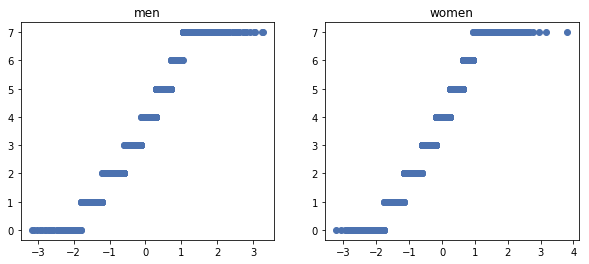

In [19]:
# Making a standard normally distributed variable with the same number of observations,
# as the samples they're being compared to, 
# a mean of 0, and standard deviation of 1 that we will use as our “comparison.”

x = len(men)
y = len(women)

norm_men = np.random.normal(0, 1, x)
norm_women = np.random.normal(0, 1, y)
# Sorting the values in ascending order.
norm_men.sort()
norm_women.sort()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
# Plotting the variable rand1 against norm in qqplots.
plt.plot(norm_men, men.sort_values(ascending=True), "o") 
plt.title("men")

plt.subplot(1,2,2)
plt.plot(norm_women, women.sort_values(ascending=True),"o",)
plt.title("women")

plt.show() 

It looks like they are not normally distributed at all. Let's run the median test and the Mann Whitney U tests.

In [20]:
stats.median_test(men, women)

(0.10448797978115422, 0.7465089423999145, 4.0, array([[ 846,  853],
        [1305, 1287]]))

Explanation of the results of the median test, from [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html):
<blockquote>

<p><strong>stat :</strong> <em>float</em> <br />
The test statistic. The statistic that is returned is determined by lambda_. The default is Pearson’s chi-squared statistic.</p>

<p><strong>p :</strong> <em>float</em><br />
The p-value of the test.</p>

<p><strong>m :</strong> <em>float</em><br />
The grand median.</p>

<p><strong>table :</strong> <em>ndarray</em> <br />
The contingency table. The shape of the table is (2, n), where n is the number of samples. The first row holds the counts of the values above the grand median, and the second row holds the counts of the values below the grand median. The table allows further analysis with, for example, scipy.stats.chi2_contingency, or with scipy.stats.fisher_exact if there are two samples, without having to recompute the table. If nan_policy is “propagate” and there are nans in the input, the return value for table is None.</p>
</blockquote>

In [21]:
stats.mannwhitneyu(men, women)

MannwhitneyuResult(statistic=2271081.5, pvalue=0.22382598497660156)

It looks like, though women on average reported slightly more TV time than men in 2012, the difference between the two distributions is marginal and not significant (p value less than 0.05) according to the Mann Whitney U test and Moon's Median test, as well as the standard t test.

<hr width="50%" />

## Question 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Relevant columns of the dataframe are **pplfair** (range 1-10) and **partner** (**1** means lives with a partner, **2** means lives alone).

In [22]:
df[df['year'] == 6].groupby('partner')['pplfair'].mean()

partner
1.0    6.080736
2.0    5.856965
Name: pplfair, dtype: float64

In [23]:
partner = df[(df['year'] == 6) & (df['partner'] == 1)]['pplfair'].dropna()
alone = df[(df['year'] == 6) & (df['partner'] == 2)]['pplfair'].dropna()

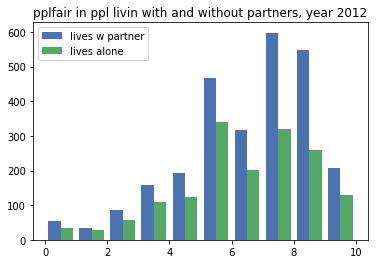

In [24]:

plt.figure()
plt.hist([partner,alone], label=["lives w partner", "lives alone"])
plt.title("{} in ppl livin with and without partners, year 2012".format('pplfair')) 
plt.legend(loc="best")
plt.show()

It looks like overall, there are more people living with a partner then living alone at each ranking of people's fairness, although at 6, 7, 8, the difference is the most dramatic. It doesn't look normally distributed, so let's not run a t-test. Since the distributions are independent (not paired) and there are only 2 different distributions, let's run the Mann Whitney U test and the median test.

In [25]:
stats.mannwhitneyu(partner,alone)

MannwhitneyuResult(statistic=1998233.5, pvalue=0.00010499272215466025)

In [26]:
stats.median_test(partner,alone)

(17.308749957810758, 3.177204901948618e-05, 6.0, array([[1352,  710],
        [1311,  898]]))

It appears that the difference is significant from the results of both tests, the median across both samples is 6, and it looks like there are more people living with a partner above the median value than below, while the same can't be said of people living alone.

<hr width="50%" />

## Question 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Relevant columns  - sclmeet, and of cousrse year and cntry.


In [27]:
df[df['year'] == 7].groupby('cntry')['sclmeet'].mean().sort_values(ascending=False)

cntry
SE    5.426211
NO    5.302326
ES    5.260116
CH    5.160622
CZ    4.445802
DE    4.428571
Name: sclmeet, dtype: float64

I'll look at NO, ES, DE, and CZ.

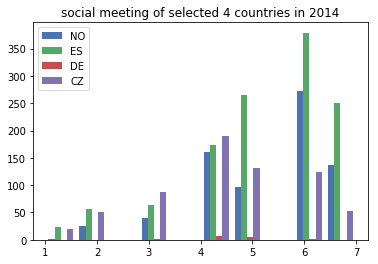

In [28]:
scl = [0,0,0,0]

selected = ['NO','ES','DE','CZ']

for i, pais in enumerate(selected):
    scl[i] = df[(df['year'] == 7) & (df['cntry'] == pais)]['sclmeet'].dropna()
    
plt.figure(figsize=(6,4))
plt.hist([scl[0], scl[1], scl[2], scl[3]], label=selected)
plt.legend(loc="upper left")
plt.title("social meeting of selected 4 countries in 2014")
plt.show()


The variables aren't normally distributed so the t test is out. Since there are more than 2 groups, we can't use the Mann Whitney U test. The median test should be good to see if there are meaningful differenes, and then we can look further from there. 

At a glance though, it looks like there is significantly less data from Germany (DE) than other countries, but proportionally it looks like Spain (ES) has more people meeting more often than other countries.  Interestingly, the Czech Republic (CZ) is the only country that has 7, however.

In [29]:
s, p, med, tabl = stats.median_test(scl[0], scl[1], scl[2], scl[3])
print(s)
print("p val: ", p)
print("median : ", med)
print(tabl)

148.48192284607256
p val:  5.600578434227416e-32
median :  5.0
[[408 629   1 177]
 [323 582  13 478]]


It looks like the differences are significant. The median test shows that overall Spain has the largest amount of people ranking higher than the median, followed by Norway, and in ES and NO, more people are abovethe median than below it, unlike DE and CZ. It might be a good idea to run the Tukey test or paired Mann Whitney U test to get more insight into the variances.

<hr width="50%" />

## Question 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Relevant columns - sclact, and of course age, year, cntry.

First, I'm going to look at the ages and decide how to group them together.

In [30]:
okay = df.agea.dropna().tolist()

print(np.mean(okay), np.median(okay), np.std(okay), min(okay), max(okay))

47.47073608617594 47.0 18.396268436738396 15.0 114.0


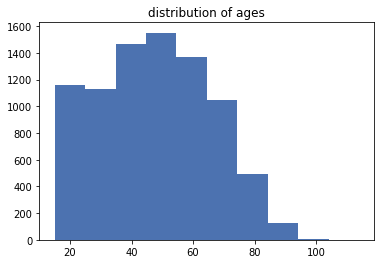

In [31]:
plt.figure()
plt.hist(okay)
plt.title('distribution of ages')
plt.show()

In light of the distribution of the ages, let's group the ages as (1) under 39, (2) 40 to 60, and (3) 61+

In [32]:
# break the dataframe into smaller dataframes
age_one = df[df['agea'] < 39]
age_two = df[(df['agea'] > 39) & (df['agea'] < 61)]
age_three = df[df['agea'] > 60]

# put the value in the agegroup column
age_one.loc[:,'ageg'] = 1
age_two.loc[:,'ageg'] = 2
age_three.loc[:,'ageg'] = 3

# concat the three groups back together into the main dataframe 
df = pd.concat([age_one,age_two,age_three])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Now let's look at the averages across each country (by age group).


In [33]:
for i in range(4):
    print(df[(df['year'] == 7) & (df['ageg'] == i)].groupby(['cntry', 
                                                             'ageg'])['sclact'].mean())


Series([], Name: sclact, dtype: float64)
cntry  ageg
CH     1       2.789474
CZ     1       2.829384
DE     1       3.000000
ES     1       2.691517
NO     1       2.908333
SE     1       2.902778
Name: sclact, dtype: float64
cntry  ageg
CH     2       2.812000
CZ     2       2.643357
DE     2       2.857143
ES     2       2.691111
NO     2       2.776596
SE     2       2.803636
Name: sclact, dtype: float64
cntry  ageg
CH     3       2.740541
CZ     3       2.729508
DE     3       2.500000
ES     3       2.402730
NO     3       2.928177
SE     3       2.926910
Name: sclact, dtype: float64


Let's look more closesly at the countries previously selected for question #5.

In [34]:
age_one = []
age_two = []
age_three = []

listed = [age_one, age_two, age_three]

# get the distributions
for pais in selected:
    for i in range(3):
        listed[i].append(df[(df['year'] == 7) & (df['cntry'] == pais) & 
                          (df['ageg'] == i+1)]['sclact'].dropna())


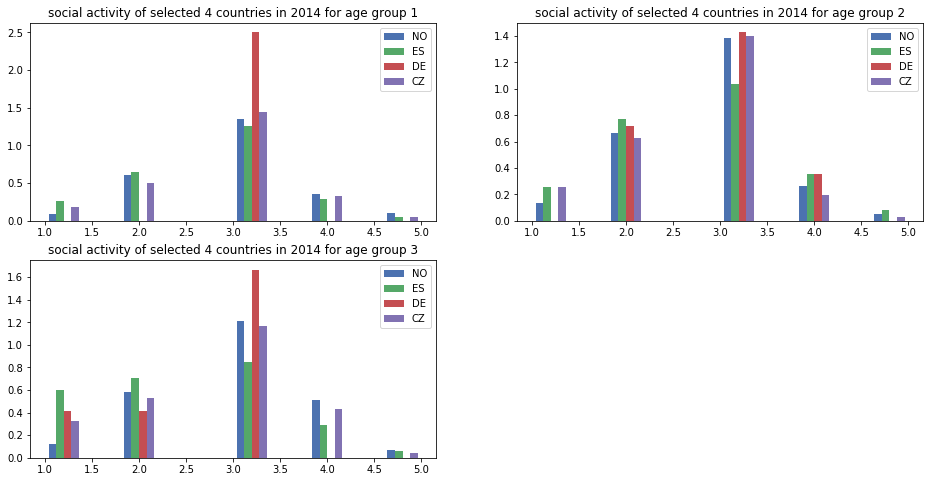

In [35]:
# plot them

plt.figure(figsize=(16,8))

for x in range(3):
    plt.subplot(2,2,x+1)
    plt.hist([listed[x][0], listed[x][1], listed[x][2], listed[x][3]], label=selected, 
             density=True) # to normalize the data
    plt.legend(loc="best")
    plt.title("social activity of selected 4 countries in 2014 for age group {}".format(x+1))
    
plt.show()

At a glance, it appears that none of them are normal distributions, and in general people of all age groups, from all countries, most frequently select between 3 and 3.5.

Since the distributions aren't normal and there are more than 2 to compare at a time, let's do the median test within each age group, to see if there are meaningful differences between countries.

In [36]:

rows = {}

for i in range(3):
    result = stats.median_test(listed[i][0], listed[i][1], 
                                          listed[i][2], listed[i][3])

    rows["ageg "+str(i+1)] = [result[0], result[1], result[2], result[3]]

pd.DataFrame.from_dict(data=rows,orient="index",columns=["s","p","med","tabl"])

,s,p,med,tabl
ageg 1,2.723448,0.436257,3.0,"[[44, 53, 0, 32], [196, 336, 1, 179]]"
ageg 2,11.209764,0.010644,3.0,"[[36, 78, 1, 25], [246, 372, 6, 261]]"
ageg 3,7.959098,0.046865,3.0,"[[42, 41, 0, 23], [139, 252, 6, 99]]"


Looking at the median test results, age group 2 and 3 have statistically significant differences (p value of less than 0.05), though for age group 3 it is very close to the cutoff.

Looking at the table, it looks like in age group 2, the second country (ES) was the one that had the most above the median, but it also had the most below the median too. 

With age group 3, the first country (NO) had the most above the median, and the second most below the median.

Let's try the Tukey test. <em>(Help with the Tukey range test from [here](http://cleverowl.uk/2015/07/01/using-one-way-anova-and-tukeys-test-to-compare-data-sets/).)</em>

In [37]:
# get dataframes for the 4 countries, in the year, selected age group and 
# have the columns be the country and the sclact

age_g2 = df[(df['year'] == 7) & (df['ageg'] == 2)].loc[:, ('cntry','sclact')].dropna()
age_g3 = df[(df['year'] == 7) & (df['ageg'] == 3)].loc[:, ('cntry','sclact')].dropna()

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# age group 2
mc = MultiComparison(age_g2['sclact'], age_g2['cntry'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  CH     CZ   -0.1686  -0.3838 0.0465 False 
  CH     DE    0.0451  -0.9071 0.9974 False 
  CH     ES   -0.1209  -0.3169 0.0751 False 
  CH     NO   -0.0354  -0.2513 0.1805 False 
  CH     SE   -0.0084  -0.2255 0.2088 False 
  CZ     DE    0.2138  -0.7368 1.1644 False 
  CZ     ES    0.0478  -0.1402 0.2357 False 
  CZ     NO    0.1332  -0.0753 0.3418 False 
  CZ     SE    0.1603  -0.0496 0.3701 False 
  DE     ES    -0.166  -1.1125 0.7804 False 
  DE     NO   -0.0805  -1.0313 0.8702 False 
  DE     SE   -0.0535  -1.0046 0.8976 False 
  ES     NO    0.0855  -0.1032 0.2742 False 
  ES     SE    0.1125  -0.0777 0.3027 False 
  NO     SE    0.027   -0.1835 0.2376 False 
--------------------------------------------
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


Interestingly enough, though according to the median test age group 2 had a p value of 0.01, according to the Tukey test and looking at the means, the null value shouldn't be rejected. 
<p />Let's look at age group 3. 

In [39]:
# age group 3
mc = MultiComparison(age_g3['sclact'], age_g3['cntry'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  CH     CZ    -0.011  -0.3269  0.3049 False 
  CH     DE   -0.2405  -1.3641  0.8831 False 
  CH     ES   -0.3378  -0.5922 -0.0835  True 
  CH     NO    0.1876  -0.0955  0.4708 False 
  CH     SE    0.1864  -0.0667  0.4394 False 
  CZ     DE   -0.2295  -1.3622  0.9032 False 
  CZ     ES   -0.3268  -0.6186 -0.0349  True 
  CZ     NO    0.1987  -0.1186  0.516  False 
  CZ     SE    0.1974  -0.0933  0.4881 False 
  DE     ES   -0.0973  -1.2143  1.0198 False 
  DE     NO    0.4282  -0.6958  1.5522 False 
  DE     SE    0.4269  -0.6899  1.5437 False 
  ES     NO    0.5254   0.2694  0.7815  True 
  ES     SE    0.5242   0.3019  0.7465  True 
  NO     SE   -0.0013   -0.256  0.2535 False 
---------------------------------------------
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


In age group 3, it looks like there are significant differences between CH and ES, CZ and ES, Es and NO, ES and SE. Because ES is the common variable in all of these pairings, it seems like ES is the one different country in terms of social activity in age group 3 (above 60).

Looking carefully at the meandiff of the pariings, it looks like the mean sclact ranking in ES is higher than that of all the other countries.